<a href="https://colab.research.google.com/github/fedhere/PUS2024/blob/main/HW3/Notebook_Linear_Regression___Water_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/temp/

/content/drive/MyDrive/temp


In [2]:
import pandas as pd

In [3]:
maxT = pd.read_csv('Temperature_max.csv', header=None).drop_duplicates( subset=[0], keep='first')

In [4]:
minT = pd.read_csv('Temperature_min.csv', header=None).drop_duplicates( subset=[0], keep='first')

In [5]:
hdi = pd.read_csv('hdi.csv', header=None).drop_duplicates( subset=[0], keep='first')

In [6]:
hhc = pd.read_csv('householdconnections.csv', header=None).drop_duplicates( subset=[0], keep='first')

In [7]:
wc = pd.read_csv('Water Consumption.csv', header=None).drop_duplicates( subset=[0], keep='first')

In [8]:
humidity = pd.read_csv('humidity.csv', header=None).drop_duplicates( subset=[0], keep='first')

In [9]:
pop = pd.read_csv('population.csv', header=None).drop_duplicates( subset=[0], keep='first')

In [10]:
rain = pd.read_csv('rainfall.csv', header=None).drop_duplicates( subset=[0], keep='first')

In [11]:
windspeed = pd.read_csv('windspeed.csv', header=None).drop_duplicates( subset=[0], keep='first')

In [12]:
maxT

,0,1
0,2010/07/29,21.184433
1,2010/08/06,22.347901
2,2010/08/10,23.361385
3,2010/08/15,24.336416
4,2010/09/09,25.037518
...,...,...
169,2018/01/16,25.408856
170,2018/01/28,26.597152
171,2018/02/16,24.500831
172,2018/02/08,25.587114


In [13]:
pop

,0,1
0,2010/07/31,2.960570e+06
1,2010/09/06,2.965557e+06
2,2010/10/13,2.977833e+06
3,2010/11/18,2.981669e+06
4,2010/12/25,2.988957e+06
...,...,...
72,2017/10/30,3.494159e+06
73,2017/12/05,3.509886e+06
74,2018/01/11,3.515257e+06
75,2018/02/17,3.522545e+06


In [14]:
# prompt: convert first column to datetime

import pandas as pd
maxT[0] = pd.to_datetime(maxT[0])
minT[0] = pd.to_datetime(minT[0])
hdi[0] = pd.to_datetime(hdi[0])
hhc[0] = pd.to_datetime(hhc[0])
wc[0] = pd.to_datetime(wc[0])
humidity[0] = pd.to_datetime(humidity[0])
pop[0] = pd.to_datetime(pop[0])
rain[0] = pd.to_datetime(rain[0])
windspeed[0] = pd.to_datetime(windspeed[0])


In [15]:
# prompt: create a  datetime range from 8/10/2010 to 3/1/2018 with spacing of 2 weeks

import pandas as pd

# Create the date range
date_range = pd.date_range(start='8/10/2010', end='3/1/2018', freq='2W')


In [16]:
date_range

DatetimeIndex(['2010-08-15', '2010-08-29', '2010-09-12', '2010-09-26',
               '2010-10-10', '2010-10-24', '2010-11-07', '2010-11-21',
               '2010-12-05', '2010-12-19',
               ...
               '2017-10-15', '2017-10-29', '2017-11-12', '2017-11-26',
               '2017-12-10', '2017-12-24', '2018-01-07', '2018-01-21',
               '2018-02-04', '2018-02-18'],
              dtype='datetime64[ns]', length=197, freq='2W-SUN')

In [17]:
# prompt: sort al l dfs by column 0

# Sort all DataFrames by column 0
maxT = maxT.sort_values(by=[0])
minT = minT.sort_values(by=[0])
hdi = hdi.sort_values(by=[0])
hhc = hhc.sort_values(by=[0])
wc = wc.sort_values(by=[0])
humidity = humidity.sort_values(by=[0])
pop = pop.sort_values(by=[0])
rain = rain.sort_values(by=[0])
windspeed = windspeed.sort_values(by=[0])


In [18]:
# prompt: interpolate the second column linearly and calculate it for every value of daterange

import numpy as np

# Interpolate maxT
maxT_interp = maxT.set_index(0)[1].reindex(date_range, method='nearest')

# Interpolate minT
minT_interp = minT.set_index(0)[1].reindex(date_range, method='nearest')

# Interpolate hdi
hdi_interp = hdi.set_index(0)[1].reindex(date_range, method='nearest')

# Interpolate hhc
hhc_interp = hhc.set_index(0)[1].reindex(date_range, method='nearest')

# Interpolate wc
wc_interp = wc.set_index(0)[1].reindex(date_range, method='nearest')

# Interpolate humidity
humidity_interp = humidity.set_index(0)[1].reindex(date_range, method='nearest')

# Interpolate pop
pop_interp = pop.set_index(0)[1].reindex(date_range, method='nearest')

# Interpolate rain
rain_interp = rain.set_index(0)[1].reindex(date_range, method='nearest')

# Interpolate windspeed
windspeed_interp = windspeed.set_index(0)[1].reindex(date_range, method='nearest')


In [19]:
# prompt: merge all dfs

import pandas as pd
# Create a DataFrame with the interpolated data
df = pd.DataFrame({
    'Date': date_range,
    'Max_Temperature': maxT_interp,
    'Min_Temperature': minT_interp,
    'HDI': hdi_interp,
    'Household_Connections': hhc_interp,
    'Water_Consumption': wc_interp,
    'Humidity': humidity_interp,
    'Population': pop_interp,
    'Rainfall': rain_interp,
    'Windspeed': windspeed_interp
})

df


,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244
...,...,...,...,...,...,...,...,...,...,...
2017-12-24,2017-12-24,26.536655,13.931328,0.701474,673544.243791,227139.808169,55.520244,3.515257e+06,97.724484,0.639987
2018-01-07,2018-01-07,26.536655,14.127310,0.701474,673544.243791,228841.709076,55.520244,3.515257e+06,81.035888,0.639987
2018-01-21,2018-01-21,25.408856,14.127310,0.701474,673544.243791,231684.219375,56.623464,3.515257e+06,75.006428,0.639987
2018-02-04,2018-02-04,25.587114,14.146367,0.701474,673544.243791,233151.979516,63.311737,3.522545e+06,89.526317,0.639014


In [20]:
df.to_csv('water_consumption.csv')

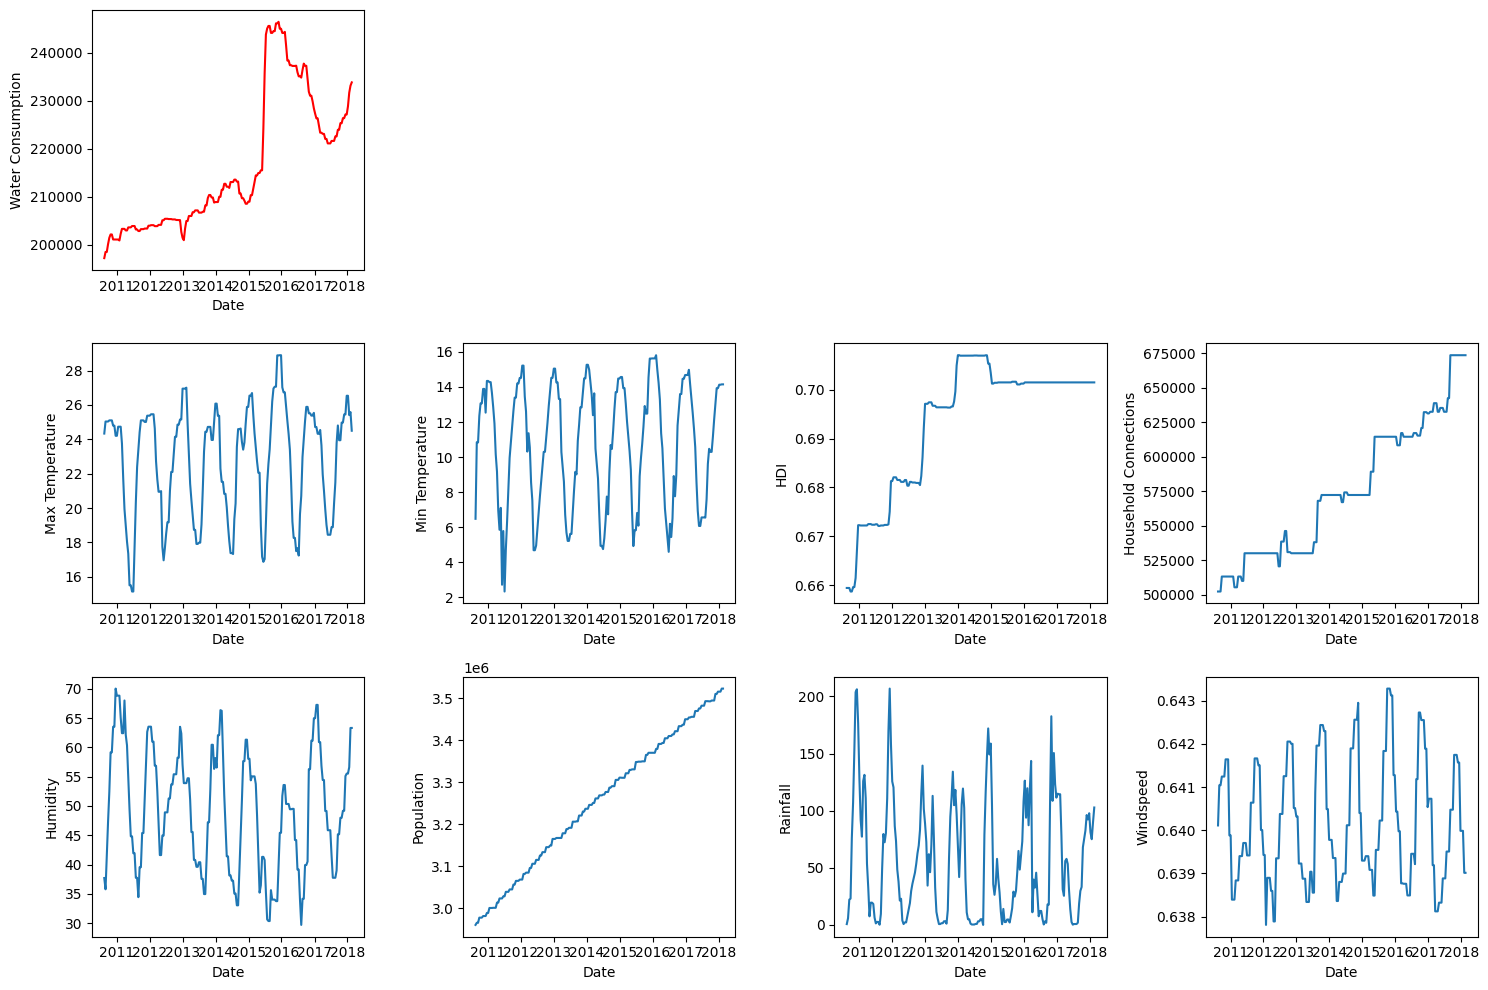

In [21]:
# prompt: plot all fratures against Date

import matplotlib.pyplot as plt

# Plotting all features against Date
plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 1)
plt.plot(df['Date'], df['Water_Consumption'], color="red")
plt.xlabel('Date')
plt.ylabel('Water Consumption')



plt.subplot(3, 4, 5)
plt.plot(df['Date'], df['Max_Temperature'])
plt.xlabel('Date')
plt.ylabel('Max Temperature')

plt.subplot(3, 4, 6)
plt.plot(df['Date'], df['Min_Temperature'])
plt.xlabel('Date')
plt.ylabel('Min Temperature')

plt.subplot(3, 4, 7)
plt.plot(df['Date'], df['HDI'])
plt.xlabel('Date')
plt.ylabel('HDI')

plt.subplot(3, 4, 8)
plt.plot(df['Date'], df['Household_Connections'])
plt.xlabel('Date')
plt.ylabel('Household Connections')


plt.subplot(3, 4, 9)
plt.plot(df['Date'], df['Humidity'])
plt.xlabel('Date')
plt.ylabel('Humidity')

plt.subplot(3, 4, 10)
plt.plot(df['Date'], df['Population'])
plt.xlabel('Date')
plt.ylabel('Population')

plt.subplot(3, 4, 11)
plt.plot(df['Date'], df['Rainfall'])
plt.xlabel('Date')
plt.ylabel('Rainfall')

plt.subplot(3, 4, 12)
plt.plot(df['Date'], df['Windspeed'])
plt.xlabel('Date')
plt.ylabel('Windspeed')

plt.tight_layout()
plt.show()


In [22]:
df.describe()
#

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,197,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000
mean,2014-05-18 00:00:00,22.820151,10.755184,0.693206,575469.302905,216086.151748,49.327576,3.253261e+06,56.300944,0.640164
min,2010-08-15 00:00:00,15.146338,2.336682,0.658733,502348.816168,197168.749996,29.708175,2.960570e+06,-0.031489,0.637809
25%,2012-07-01 00:00:00,20.275245,7.596494,0.681300,530077.653037,204110.307828,40.525643,3.115161e+06,7.538785,0.639014
50%,2014-05-18 00:00:00,23.964625,11.355749,0.701456,572273.709141,210313.350617,49.408814,3.268602e+06,40.916367,0.639882
75%,2016-04-03 00:00:00,25.104217,13.930920,0.701474,614469.765245,226332.627614,57.033724,3.390970e+06,96.142387,0.641277
max,2018-02-18 00:00:00,28.896027,15.808946,0.707032,673544.243791,246476.038257,70.025291,3.522545e+06,206.857482,0.643281
std,NaN,3.214211,3.450827,0.013474,48696.828622,14132.209414,10.165083,1.627993e+05,52.049954,0.001396


In [23]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable

import statsmodels.formula.api as smf

# Define the formula for the regression
formula = 'Water_Consumption ~ Max_Temperature + Min_Temperature + HDI + Household_Connections + Humidity + Population + Rainfall + Windspeed'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Water_Consumption   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.85
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.47e-49
Time:                        19:37:27   Log-Likelihood:                -2032.3
No. Observations:                 197   AIC:                             4083.
Df Residuals:                     188   BIC:                             4112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.818e+

In [24]:
# prompt: whiten the dataframe

from sklearn.preprocessing import StandardScaler

# Select the numerical features
numerical_features = ['Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections',
                      'Humidity', 'Population', 'Rainfall', 'Windspeed', 'Water_Consumption']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[numerical_features])

df_copy = df.copy()
# Transform the numerical features
df_copy[numerical_features] = scaler.transform(df[numerical_features])

# Print the whitened DataFrame
df_copy


,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,0.472940,-1.241464,-2.510822,-1.505371,-1.342012,-1.146113,-1.802439,-1.071380,-0.037186
2010-08-29,2010-08-29,0.691621,0.028358,-2.510822,-1.505371,-1.250592,-1.335672,-1.771730,-0.972297,0.631199
2010-09-12,2010-09-12,0.691621,0.022531,-2.510822,-1.505371,-1.250592,-0.760205,-1.771730,-0.658279,0.631199
2010-09-26,2010-09-26,0.691621,0.462375,-2.564927,-1.281987,-1.134640,-0.196461,-1.696137,-0.641762,0.775965
2010-10-10,2010-10-10,0.712425,0.670640,-2.564927,-1.281987,-1.040482,0.305484,-1.696137,0.378289,0.775965
...,...,...,...,...,...,...,...,...,...,...
2017-12-24,2017-12-24,1.159218,0.922746,0.615217,2.019122,0.784153,0.610762,1.613421,0.797870,-0.126872
2018-01-07,2018-01-07,1.159218,0.979683,0.615217,2.019122,0.904887,0.610762,1.613421,0.476426,-0.126872
2018-01-21,2018-01-21,0.807446,0.979683,0.615217,2.019122,1.106537,0.719569,1.613421,0.360291,-0.126872
2018-02-04,2018-02-04,0.863046,0.985220,0.615217,2.019122,1.210660,1.379210,1.658304,0.639963,-0.825696


In [25]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable with sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the features (independent variables)
vars = ['Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections',
              'Humidity', 'Population', 'Rainfall', 'Windspeed']
X1 = df_copy[vars]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = X.iloc[:150], X.iloc[150:], y.iloc[:150], y.iloc[150:]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model1 = LinearRegression()

# Fit the model to the training data
model1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars, model1.coef_)))
print("Intercept:", model1.intercept_)


Mean Squared Error: 0.3420468071589483
R-squared: 0.6098046035171198
Coefficients: [('Max_Temperature', -0.29198199171491784), ('Min_Temperature', 0.5095721039123415), ('HDI', -0.20188300768994039), ('Household_Connections', 0.30929839485768845), ('Humidity', -0.5739886741570124), ('Population', 0.6238742590778729), ('Rainfall', 0.2081542818225139), ('Windspeed', -0.034216115740266034)]
Intercept: 0.003830869600707115


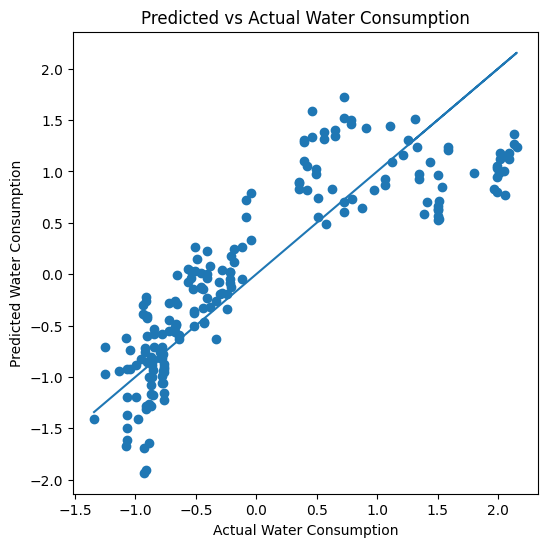

In [26]:
# prompt: plot predicted vs actual water_consumption based on sklearn model

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model1.predict(X1))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


Text(0, 0.5, 'Water Consumption')

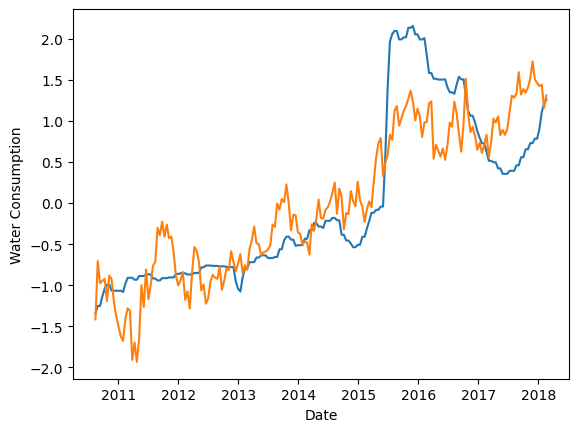

In [27]:

plt.plot(df['Date'], df_copy['Water_Consumption'])
plt.plot(df['Date'], model1.predict(X1))
plt.xlabel('Date')
plt.ylabel('Water Consumption')

In [28]:
df_copy.corr()>0.5

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Date,True,False,False,True,True,True,False,True,False,False
Max_Temperature,False,True,True,False,False,False,False,False,True,False
Min_Temperature,False,True,True,False,False,False,True,False,True,False
HDI,True,False,False,True,True,True,False,True,False,False
Household_Connections,True,False,False,True,True,True,False,True,False,False
Water_Consumption,True,False,False,True,True,True,False,True,False,False
Humidity,False,False,True,False,False,False,True,False,True,False
Population,True,False,False,True,True,True,False,True,False,False
Rainfall,False,True,True,False,False,False,True,False,True,False
Windspeed,False,False,False,False,False,False,False,False,False,True


In [29]:
vars2 = ['HDI', 'Household_Connections',
              'Population']

In [30]:
X2 = df_copy[vars2]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = X.iloc[:150], X.iloc[150:], y.iloc[:150], y.iloc[150:]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model2 = LinearRegression()

# Fit the model to the training data

# Create a Linear Regression model
model2 = LinearRegression()

# Fit the model to the training data
model2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars2, model2.coef_)))
print("Intercept:", model2.intercept_)


Mean Squared Error: 0.34083550523675454
R-squared: 0.6111864156665057
Coefficients: [('HDI', -0.06386950349337545), ('Household_Connections', 0.5581389845700675), ('Population', 0.3271159102297173)]
Intercept: 0.007898437962974953


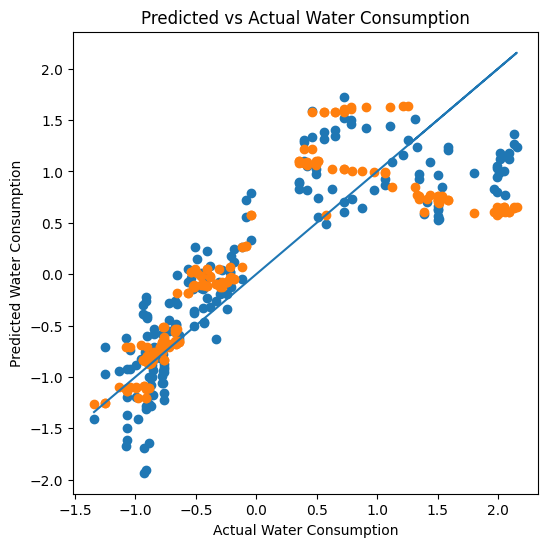

In [31]:
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model1.predict(X1))
plt.scatter(y, model2.predict(X2))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()
